In [1]:
# Import standard modules

import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as con
import scipy.io as si

# Import pymsg

import pymsg

# Set constants

M_SUN = con.M_sun.cgs.value
R_SUN = con.R_sun.cgs.value
G = con.G.cgs.value
C = con.c.cgs.value
PC = con.pc.cgs.value

# Set plot parameters

plt.rcParams.update({'font.size': 12})

In [2]:
def synthesize_irradiance(specgrid, lam, M, R, Teff, d, vsini, nrho=128, nphi=128):

    # Set up a grid of rho and phi coordinates for the quadrature

    drho = 1/nrho
    dphi = 2*np.pi/nphi

    rho, phi = np.meshgrid(np.linspace(drho/2, 1-drho/2, nrho), 
                           np.linspace(dphi/2, 2*np.pi-dphi/2, nphi))

    # Evaluate mu (angle), dA_proj (projected area) and 
    # v_proj (projected velocity)

    mu = np.cos(np.arcsin(rho))
    dA_proj = ((rho + drho/2)**2 - (rho - drho/2)**2)*dphi/2
    v_proj = vsini*1E5*rho*np.sin(phi)

    # Evaluate dOmega (solid angle) and z (redshift) 

    dOmega = (R*R_SUN)**2/(d*PC)**2*dA_proj
    z = v_proj/C

    # Set up (uniform) photospheric parameters

    x = {'Teff': np.full(nrho*nphi, Teff), 
         'log(g)': np.full(nrho*nphi, np.log10(G*M*M_SUN/(R*R_SUN)**2))}

    # Synthesize the irradiance. The .flatten() calls are because
    # MSG expects 1-D arrays

    F_obs = specgrid.irradiance(x, mu.flatten(), dOmega.flatten(), z.flatten(), lam)

    # Return the irradiance

    return F_obs

In [3]:
# Create the SpecGrid object

specgrid = pymsg.SpecGrid('sg-HeI-6678.h5')

# Set up parameters (mass, radius and effective temperature from Wikipedia,
# https://en.wikipedia.org/wiki/B-type_main-sequence_star; the choices of 
# vsini and distance are arbitrary)

M = 7.30
R = 4.06
Teff = 20600.
vsini = 100
d = 10

# Set up the wavelength abscissa

lam = np.linspace(6670, 6690, 201)
lam_c = 0.5*(lam[:-1] + lam[1:])

# Evaluate the irradiance spectrum

F_obs = synthesize_irradiance(specgrid, lam, M, R, Teff, d, vsini)

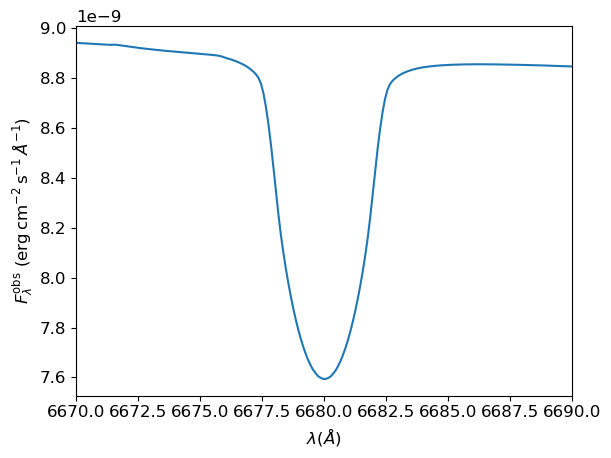

In [4]:
# Plot the irradiance spectrum

plt.figure()

plt.plot(lam_c, F_obs)
plt.xlim(6670, 6690)

plt.xlabel(r'$\lambda ({\AA})$')
plt.ylabel(r'$F^{\mathrm{obs}}_{\lambda}\ ({\rm erg\,cm^{-2}\,s^{-1}}\,\AA^{-1})$');